# **COVID-19 Tweets Analysis**
    
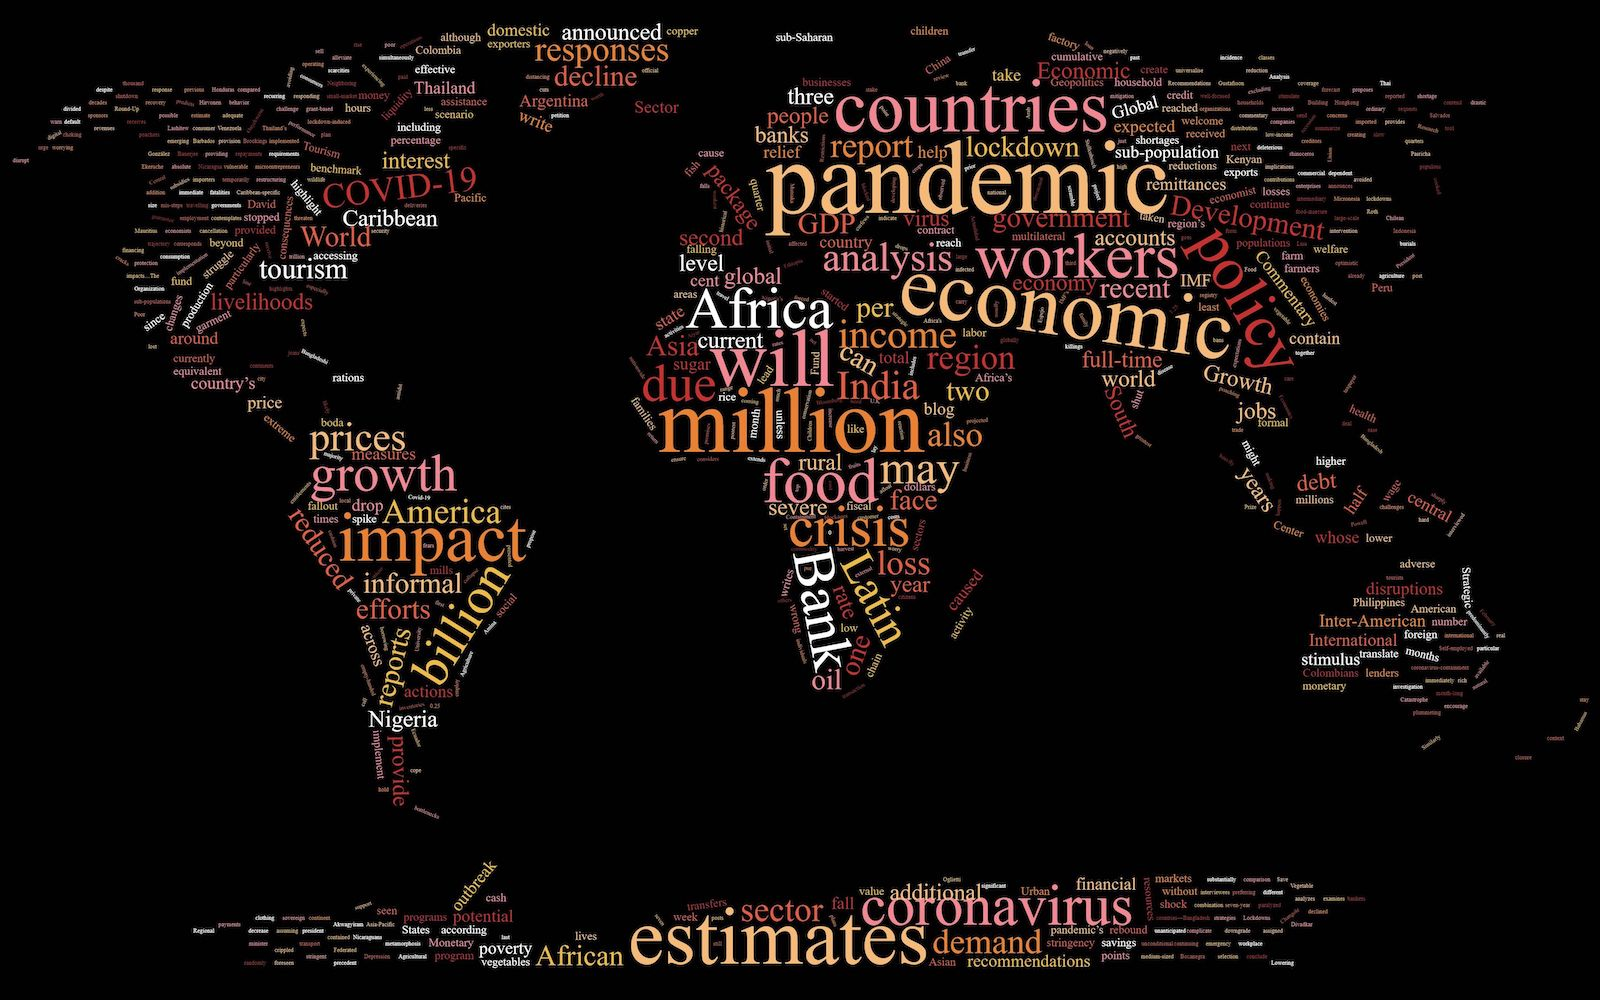
        
                                                                       BY
                                                                           Athira CV
                                                                           Divya Chandini
                                                                           Firos Vp
                                                                           Raghuram
                                                                           Subathra Raja
                                                                           Vishnu Bhaskar

# We have don analysis on following constraints(steps): 
## 1. Data Preperation

## 2. Tweets by timestamp
###           2.1 Day wise tweets
###           2.2 Month wise tweets 
###           2.3 Hour wise tweets

## 3. Most frequent tweets
###          3.1 Most used Hash-Tags 
###          3.2 Most tweeted User 
###          3.3 Most tweeeted Bi-grams , Tri grams ..etc.
###          3.4 A word cloud using frequent tweets.

## 4. Sentimental analysis
###          4.1 Location wise sentiment analysis 
###          4.2 Positivity in tweets


# 1. Data Preperation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv('/kaggle/input/covid19-tweets/covid19_tweets.csv')
data.head()

In [ ]:
data.tail()

In [ ]:
data.columns   

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data["user_verified"].unique()

In [ ]:
is_verify = len(data[data["user_verified"]==True])
is_not_verify = len(data[data["user_verified"]==False])
print("Number of User Verified", is_verify)
print("Number of User Not Verified", is_not_verify)
print('Total_percentage_of_verified_user = ',(is_verify/data.shape[0])*100)


Note 1: Only a small percentage of users are verified. Which would be Actors, news channels and other         celebrity Pages/users.

In [ ]:
sns.countplot(data.user_verified)
plt.show()

# 2. Tweets by Timestamp

In [ ]:
def Top10(data):
    user_cols = ['user_name', 'user_location', 'source']
    for col in user_cols:
        data[col].value_counts().head(10).plot(kind = 'bar', figsize = (10,5))
        print(data[col].value_counts().head(10))
        plt.show()
        
Top10(data)

Note x: 

        > Official accounts of Health organisations and news channels are tweeted most frequently about Covid-19.

        > India Topped the list as User location
        
        > Twitter web app and android apps are mostly used for tweet.
        
        > And we think there is too much rich peoples are using twitter because , Iphone is listed 3rd for tweeting and it is little behind the anadroid twitter app !.
        

In [ ]:
data['hashtags'] = data['hashtags'].fillna('[]')
data['hashtags_count'] = data['hashtags'].apply(lambda x: len(x.split(',')))
data.loc[data['hashtags'] == '[]', 'hashtags_count'] = 0
data.head(10)

Note: New column added with hash-tag count

In [ ]:
data['hashtags_count'].describe()

In [ ]:
ds = data.groupby('hashtags_count')['user_name'].count().reset_index()
ds.columns = ['hashtags_count', 'count']
ds = ds.sort_values(['count'])
ds['hashtags_count'] = ds['hashtags_count'].astype(str) + ' tags'
fig = sns.barplot(data=ds, x="count", y="hashtags_count")
fi


Note: only few users used 10+ Hashtags in thier tweets.

In [ ]:
# ds = data[data['tweets_count']>10]
ds = data.groupby(['user_name'])['hashtags_count'].mean().reset_index()
ds.columns = ['user', 'mean_count']
ds = ds.sort_values(['mean_count'])
fig = sns.barplot(data=ds.tail(20), x="mean_count", y="user")
# fig.figure

Note: Users with most No. of Hash-Tags in a single tweet.

In [ ]:
data['date'] = pd.to_datetime(data['date']) 
data = data.sort_values(['date'])
data['day'] = data['date'].astype(str).str.split(' ', expand=True)[0]
data['time'] = data['date'].astype(str).str.split(' ', expand=True)[1]
data.head()

Note: in above cell we just added day and time column seperately by splitting datas of Date.

In [ ]:
data['date'].head()

In [ ]:
data['new_date'] = pd.to_datetime(data['date'])
data['new_date'].head()

In [ ]:
data['year'] = data['new_date'].dt.year
data['month'] = data['new_date'].dt.month
data['day'] = data['new_date'].dt.day
data['dayofweek'] = data['new_date'].dt.dayofweek
data['hour'] = data['new_date'].dt.hour
data['minute'] = data['new_date'].dt.minute
data['dayofyear'] = data['new_date'].dt.dayofyear
data['date_only'] = data['new_date'].dt.date

In [ ]:
data.groupby(['year', 'month'])['text'].count().plot(kind = 'bar', figsize = (15,5))
plt.show()

In [ ]:
data.groupby( ['month', 'day'])['text'].count().plot(kind = 'bar', figsize = (15,5))
plt.show()

In [ ]:
sns.heatmap(data.drop('is_retweet',axis=1).corr())
plt.title("Correlation in data")
plt.show()